# Raspberry Pi Mouse sensor monitor

[raspimouse_http_controller](https://github.com/Tiryoh/raspimouse_http_controller)と組み合わせて使用するラズパイマウスのセンサ値連続受信用Jupyter Notebookです。

注がある場合を除き、本ページに掲載されているコードはMITライセンスに、文章はクリエイティブ・コモンズ・ライセンスに基づいて公開します。
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

## Requirements

Python 3を必要とします。

# step1
Pythonのモジュールをインポートします。
Jupyter Notebookでの描画に必要なモジュールと、ラズパイマウスとの通信に必要なモジュールと分かれています。

In [1]:
# 数値計算及び描画に必要なモジュール
import numpy as np
import math
from  matplotlib import pyplot as plt
from  matplotlib import patches as patches

# 通信用
import urllib.request
import time
import argparse
import json
import threading

# JupyterNotebook用モジュール
from IPython import display

# デバッグ用
from pprint import pprint

# step2

受信用のクラス(Receiver)を作成します。ラズパイマウスとTCP通信を行います。

In [2]:
class Reciever(object):
    def __init__(self, ip, port):
        print("init")
        self.url = "http://{}:{}".format(ip, port)
        print ("connecting to " + self.url)

    def get_sensor_val(self):
        start = time.time()
        request = urllib.request.Request(self.url)
        response = urllib.request.urlopen(request)
        sensor_dict = json.loads(response.read().decode('utf-8'))
        return sensor_dict

# step3

ラズパイマウスと接続を確立します。
引数にはIPアドレスと使用するTCPポートを指定します。

In [3]:
# r = Receiver("192.168.64.3", 5000)
r = Receiver("192.168.22.234", 5000)

init
connecting to http://192.168.22.234:5000


# step4

試しにラズパイマウスからセンサの値を受信し、`print` してみます。

In [4]:
history = []
hoge = r.get_sensor_val()
history.append(hoge)
print(hoge)
print(history)

{'line sensor': {'1': 11, '3': -2, '2': 16, '0': 26}, 'switch': {'1': 0, '2': 0, '0': 0}}
[{'line sensor': {'1': 11, '3': -2, '2': 16, '0': 26}, 'switch': {'1': 0, '2': 0, '0': 0}}]


# step5

ラズパイマウスからセンサの値を連続受信し、`pprint` してみます。
`pprint` を用いることで `print` される内容が整形されます。

In [5]:
for i in range(10):
    hoge = r.get_sensor_val()
    history.append(hoge)
    time.sleep(0.1)

pprint(history)

[{'line sensor': {'0': 26, '1': 11, '2': 16, '3': -2},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 22, '1': 16, '2': 14, '3': 0},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 30, '1': 12, '2': 15, '3': 2},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 26, '1': 13, '2': 21, '3': 6},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 22, '1': 14, '2': 20, '3': 3},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 26, '1': 14, '2': 18, '3': 4},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 27, '1': 12, '2': 8, '3': 7},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 24, '1': 8, '2': 16, '3': -2},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 26, '1': 10, '2': 14, '3': 7},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 26, '1': 10, '2': 10, '3': 0},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'line sensor': {'0': 28, '1': 10, '2': 18, '3': 3},
  'switch': {'0'

# step6

ラズパイマウスからセンサの値を連続受信し、受信するたびにグラフに描画します。  
実際に動いている様子は<a href="https://youtu.be/lDSP9AbkdVw" target="_blank">YouTube</a>から確認できます。

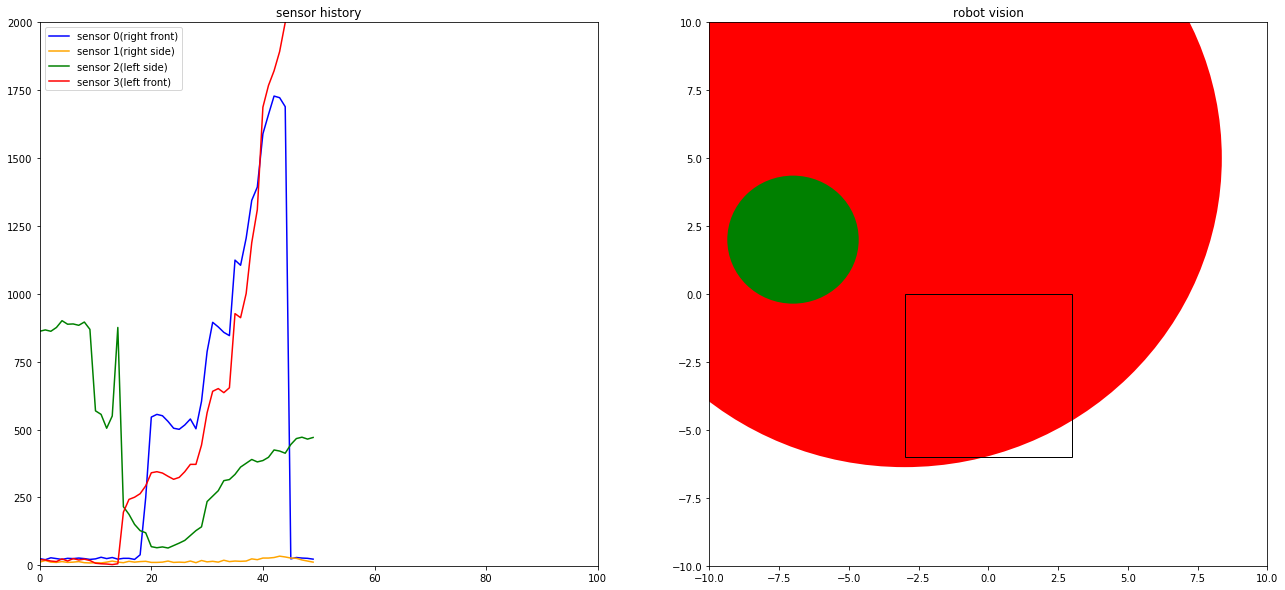

done.


In [6]:
history = []

for i in range(30):
    
    if len(history) > 99:
        history = []
    
    # ラズパイマウスから情報取得
    for i in range(5):
        hoge = r.get_sensor_val()
        history.append(hoge)
        time.sleep(0.1)
    
    # タイトル付き新規ウィンドウ、座標軸を用意
    fig = plt.figure(figsize=(22, 10))
    
    graph = plt.subplot(1,2,1)
    graph.set_title("sensor history")
    graph.set_xlim(0,100)
    graph.set_ylim(-1.5,2000)
    
    view = plt.subplot(1,2,2)
    view.set_title("robot vision")
    view.set_xlim(-10,10)
    view.set_ylim(-10,10)


    x_arr = np.array([])
    y1_arr = np.array([])
    y2_arr = np.array([])
    y3_arr = np.array([])
    y0_arr = np.array([])

    for i in range(len(history)):
        x_arr = np.append(x_arr, i)
        y0_arr = np.append(y0_arr, history[i]["line sensor"]["0"])
        y1_arr = np.append(y1_arr, history[i]["line sensor"]["1"])
        y2_arr = np.append(y2_arr, history[i]["line sensor"]["2"])
        y3_arr = np.append(y3_arr, history[i]["line sensor"]["3"])

    graph.plot(x_arr, y0_arr, label = "sensor 0(right front)", color = 'blue')
    graph.plot(x_arr, y1_arr, label = "sensor 1(right side)", color = 'orange')
    graph.plot(x_arr, y2_arr, label = "sensor 2(left side)", color = 'green')
    graph.plot(x_arr, y3_arr, label = "sensor 3(left front)", color = 'red')
    
    rf = patches.Circle(xy=(3, 5), radius=(history[len(history)-1]["line sensor"]["0"])/200, fc='blue')
    rs = patches.Circle(xy=(7, 2), radius=(history[len(history)-1]["line sensor"]["1"])/200, fc='orange')
    lf = patches.Circle(xy=(-3, 5), radius=(history[len(history)-1]["line sensor"]["3"])/200, fc='red')
    ls = patches.Circle(xy=(-7, 2), radius=(history[len(history)-1]["line sensor"]["2"])/200, fc='green')
    robot = patches.Rectangle(xy=(-3, -6), width=6, height=6, ec='#000000', fill=False)
    view.add_patch(rf)
    view.add_patch(rs)
    view.add_patch(lf)
    view.add_patch(ls)
    view.add_patch(robot)

    # 左上に凡例を追加
    graph.legend(loc='upper left')

    # 現在の状態を確認
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #time.sleep(0.05)
    
print("done.")